<a href="https://colab.research.google.com/github/UmmuHusnul/Assignment-7_Tugas-2-PCD/blob/main/assigment7_tugas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 7 Tugas 2**

**Sel Darah Nomor 37**

- Audry Jesica Putri (1301204119)

- Ummu Husnul Khatimah (1301204120)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

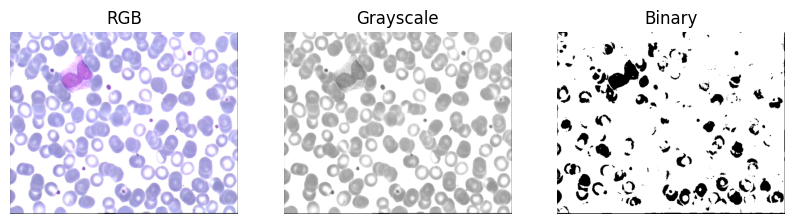

In [ ]:
# Membaca gambar menjadi RGB dan mengubah menjadi Grayscale
image_path = '37.bmp'
rgb = cv2.imread(image_path)
grayscale = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)

# Lakukan operasi thresholding untuk mengubah citra ke biner
_, binary = cv2.threshold(grayscale, 170, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1), plt.imshow(cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB)), plt.title('RGB'), plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(grayscale, cmap='gray'), plt.title('Grayscale'), plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(binary, cmap='gray'), plt.title('Binary'), plt.axis('off')
plt.show()

In [ ]:
# Lakukan operasi morfologi untuk membersihkan dan membentuk boundary
kernel = np.ones((5, 5), np.uint8)
dilated_image = cv2.dilate(binary, kernel, iterations=1)
eroded_image = cv2.erode(binary, kernel, iterations=1)

# Operasi Morphological Gradient
morphological_gradient = cv2.morphologyEx(grayscale, cv2.MORPH_GRADIENT, kernel)

In [ ]:
# Metode Thinning
thinned = cv2.ximgproc.thinning(binary)

# Metode Skeletonizing
skeletonized= cv2.ximgproc.thinning(binary, thinningType=cv2.ximgproc.THINNING_GUOHALL)

# Lakukan operasi dilasi untuk efek thickening
thickening_kernel = np.ones((3, 3), np.uint8)
thickened = cv2.dilate(binary, thickening_kernel, iterations=1)

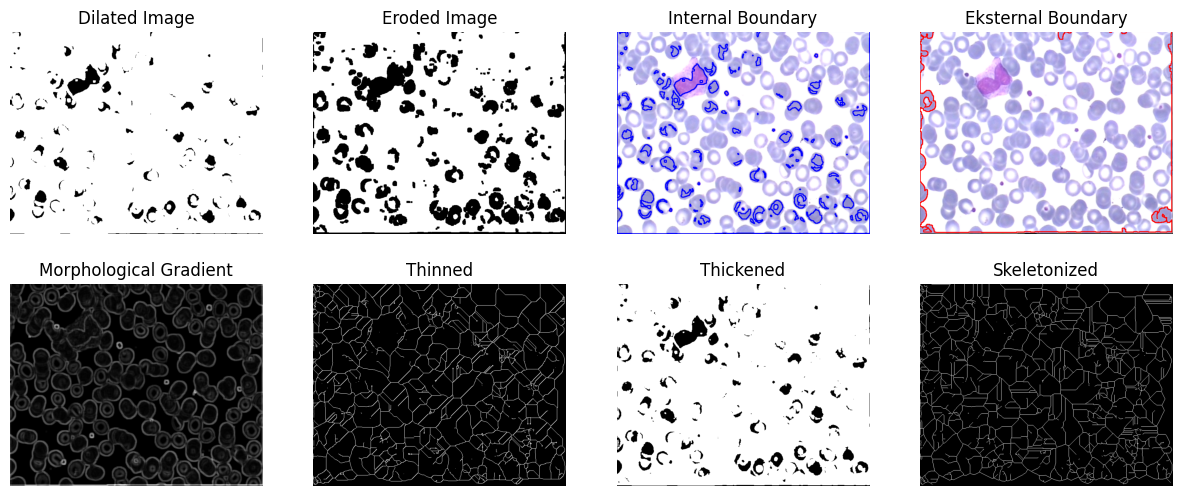

In [ ]:
# Temukan kontur pada gambar hasil operasi morfologi
contours_external, _ = cv2.findContours(eroded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_internal, _ = cv2.findContours(dilated_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Gambar boundary pada gambar asli
boundary_image_external = rgb.copy()
boundary_image_internal = rgb.copy()
cv2.drawContours(boundary_image_external, contours_external, -1, (0, 0, 255), 2)
cv2.drawContours(boundary_image_internal, contours_internal, -1, (255, 0, 0), 2)

# Tampilkan hasilnya menggunakan Matplotlib
plt.figure(figsize=(15, 6))

plt.subplot(2, 4, 1), plt.imshow(dilated_image, cmap='gray'), plt.title('Dilated Image'), plt.axis('off')
plt.subplot(2, 4, 2), plt.imshow(eroded_image, cmap='gray'), plt.title('Eroded Image'), plt.axis('off')
plt.subplot(2, 4, 3), plt.imshow(cv2.cvtColor(boundary_image_internal, cv2.COLOR_BGR2RGB)), plt.title('Internal Boundary'), plt.axis('off')
plt.subplot(2, 4, 4), plt.imshow(cv2.cvtColor(boundary_image_external, cv2.COLOR_BGR2RGB)), plt.title('Eksternal Boundary'), plt.axis('off')
plt.subplot(2, 4, 5), plt.imshow(morphological_gradient, cmap='gray'), plt.title('Morphological Gradient'), plt.axis('off')
plt.subplot(2, 4, 6), plt.imshow(thinned, cmap='gray'), plt.title('Thinned'), plt.axis('off')
plt.subplot(2, 4, 7), plt.imshow(thickened, cmap='gray'), plt.title('Thickened'), plt.axis('off')
plt.subplot(2, 4, 8), plt.imshow(skeletonized, cmap='gray'), plt.title('Skeletonized'), plt.axis('off')
plt.show()

In [ ]:
# Menghitung Sel Darah dari Kontur Biner
def hitung_sel(contours):
  sel_areas = []

  for contour in contours:
    sel_areas.append(cv2.contourArea(contour))
  jumlah_sel = len(sel_areas)
  return (jumlah_sel)

# Eksternal dan Internal
count_cells_eksternal = hitung_sel(contours_external)
count_cells_internal = hitung_sel(contours_internal)

# Keseluruhan
all_count = count_cells_eksternal + count_cells_internal

print(f'Jumlah Sel Darah: \nInternal: {count_cells_internal}\nEksternal: {count_cells_eksternal}')
print(f'\nJumlah Keseluruhan Sel Darah: {all_count}')

Jumlah Sel Darah: 
Internal: 185
Eksternal: 4

Jumlah Keseluruhan Sel Darah: 189
